In this notebook, we will use multiple techniques to select the best features required for our ML model.

## Getting things ready...

In [1]:
!pip install sweetviz --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 24.9 MB/s eta 0:00:00


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
%matplotlib inline
import sweetviz as sv

In [3]:
# loading fetch_california_housing dataset and displaying its head
# creating instance
df = fetch_california_housing()
# creating dataframe of the dependent features
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Using variance technique. ( only for numerical features )
We use the variance and drop the features that have low variance. These features provide very less information (as they have low diversity) related to the data so as they can't be useful for our ML model.

In [4]:
# computing variances of all the features
variances = df.var(numeric_only = True)

# extracting feature names with variance less than the threshold
threshold = 0.1
low_variance_features = variances[variances < threshold].index
print(f"Low variance feature names: {low_variance_features}")

# dropping features with low variance
df = df.drop(low_variance_features, axis = 1)

Low variance feature names: Index([], dtype='object')


No features have 0 variance.

## Using correlation technique. (only for numerical features)
We use the correlation technique and drop the features (independent) that have high correlation with each other.

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<Axes: >

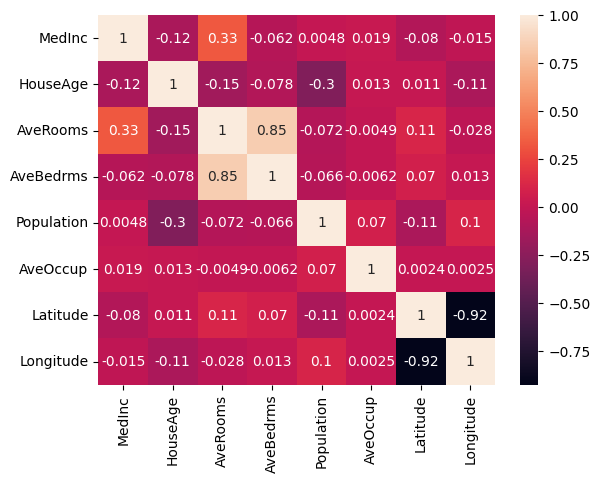

In [6]:
# displaying the correlation of the dataset
sns.heatmap(df.corr(), annot = True)

In [7]:
# function to find correlation between the features and return a list of feature names that have correlation more than the specified threshold.
def extract_highly_corr(df, threshold):
  highly_corr_feats = set()
  # computing pearson correlation (will return a DataFrame)
  corr_matrix = df.corr()

  # looping through each column of the matrix using its index
  for i in range(len(corr_matrix.columns)):

    # looping through each value of the column using its index
    for j in range(i):
      # for each value of the column, doing comparison with the threshold and if is greater than the threshold then storing the feature name in the list \
      # of highly_corr_feats set.
      if abs(corr_matrix.iloc[i, j] > threshold):
        # extracting the feature name whose correlation values (with other features) we are comparing
        highly_corr_feats.add(corr_matrix.columns[i])

  return highly_corr_feats

In [8]:
# computing highly correlated feature names using the declared function
extract_highly_corr(df, 0.7)

{'AveBedrms'}

So, here we got the feature `AveBedrms` that we can also see in the heatmap, had the correlation value ( with AveRooms ) greater than the threshold i.e. 0.7.

NOTE: Both the techniques are not used solely but in combination with other techniques because there may be some features that have low variance or high correlation with each other (independent features) but are still useful of the model.

## Using information gain or mutual information
- Information gain is generally used in decision trees where the decision is made based on the entropy (less entropy, more information).
- Mutual information is more general term and it measures the mutual information between 2 variables.
- We use this techniques in both classification and regression problems. The aim is to get information about the features on which the dependent variable depends the more. ( have more information gain ).

### For Classification Problem

In [9]:
# loading the dataset
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# checking the length, data types and null values of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


So we have all values in int or float format.

                                             |          | [  0%]   00:00 -> (? left)


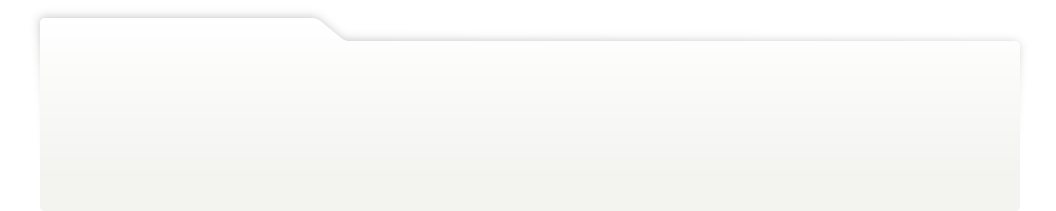
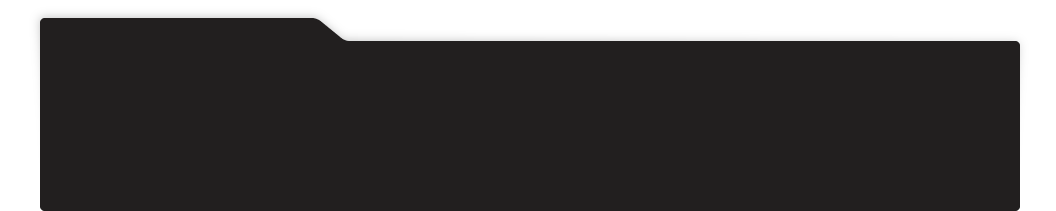
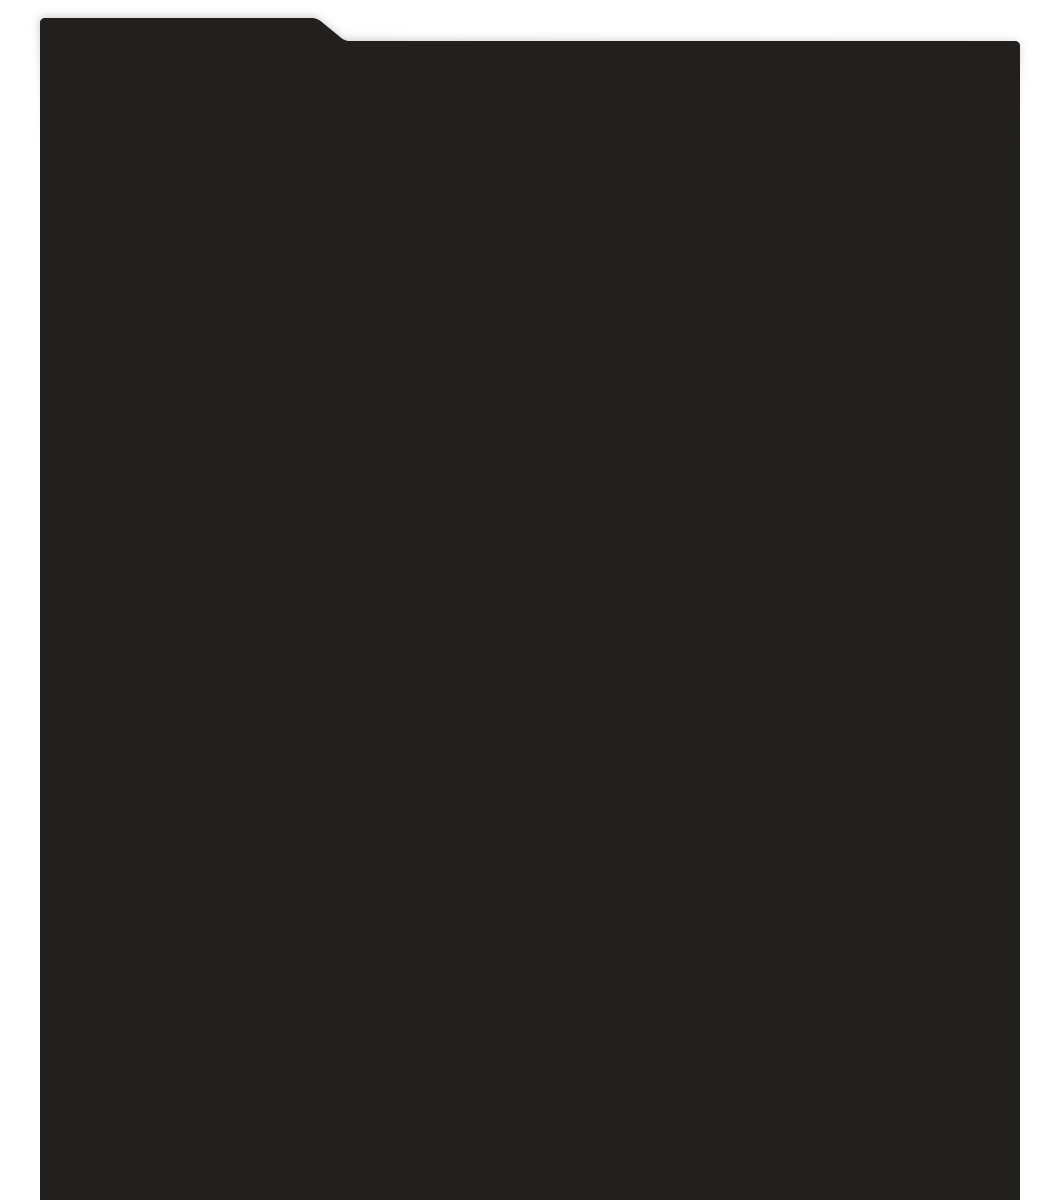
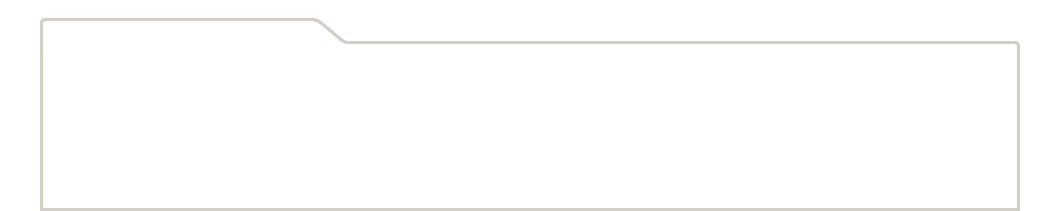
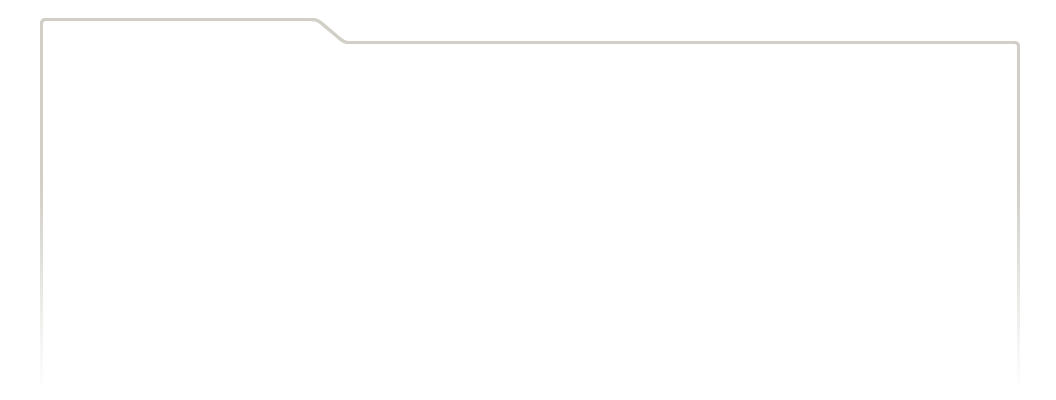
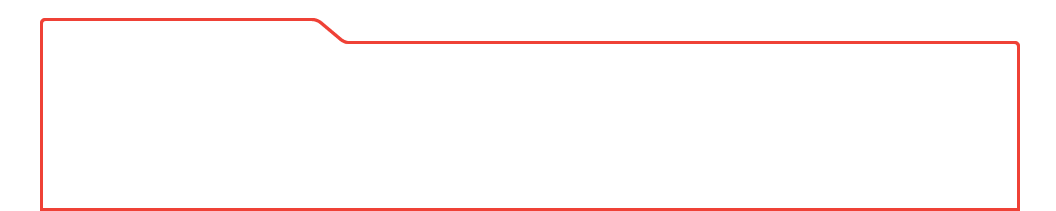
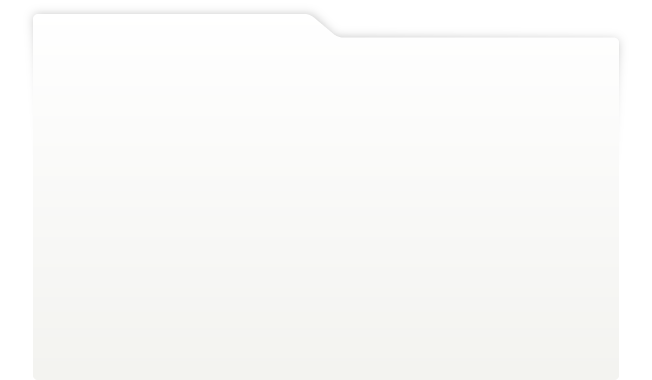
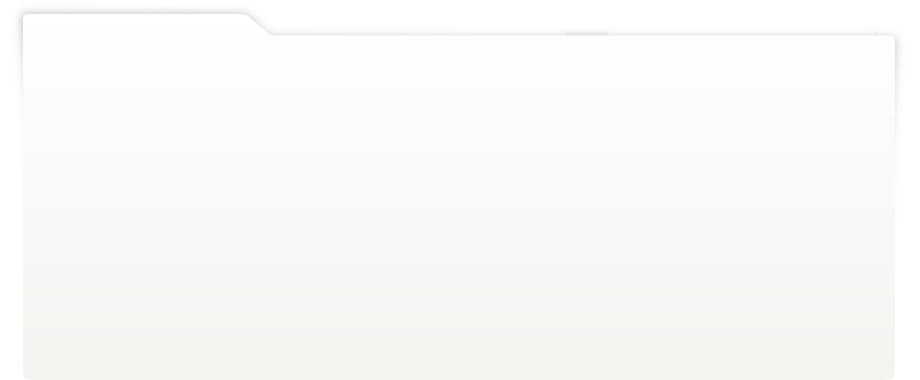
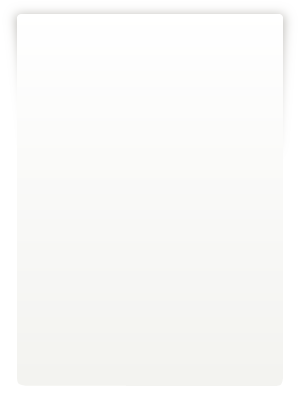
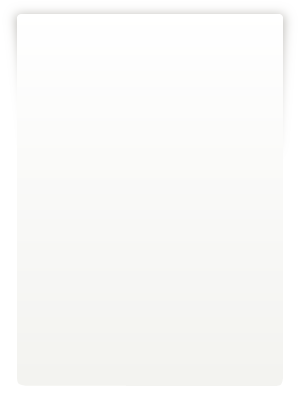
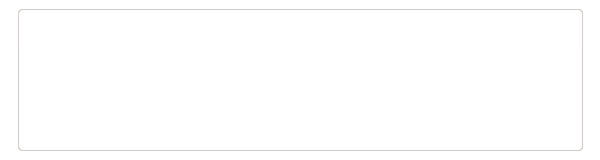
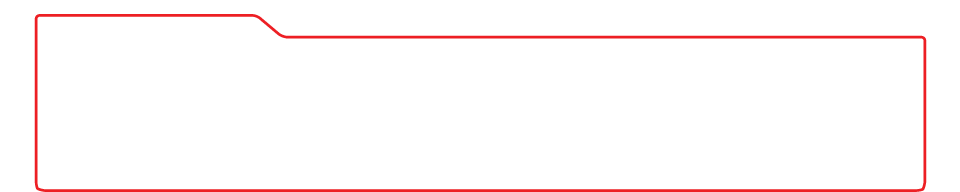
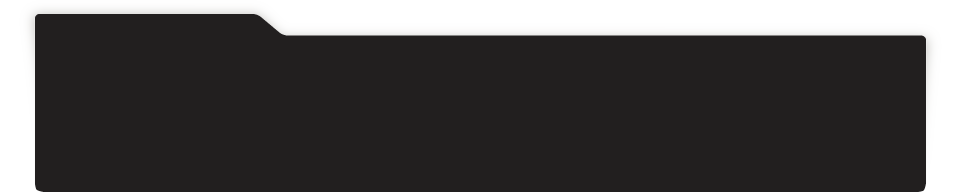
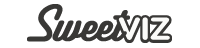
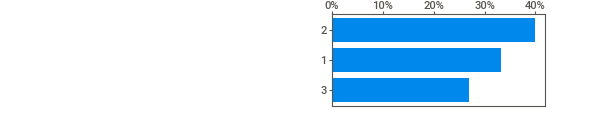
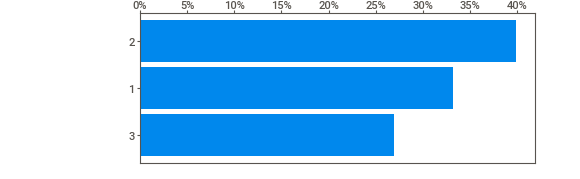
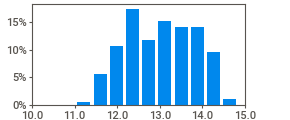
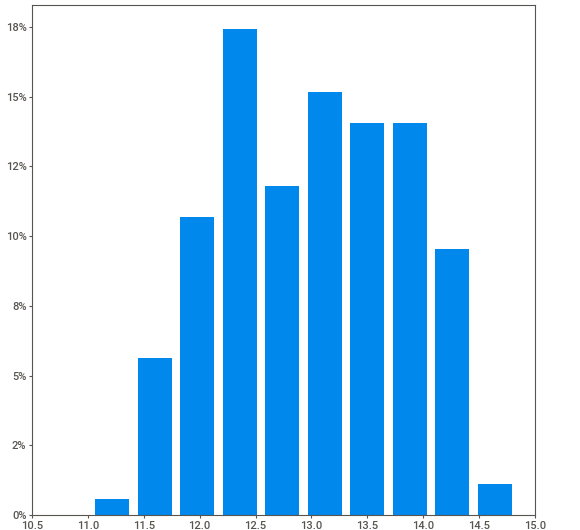
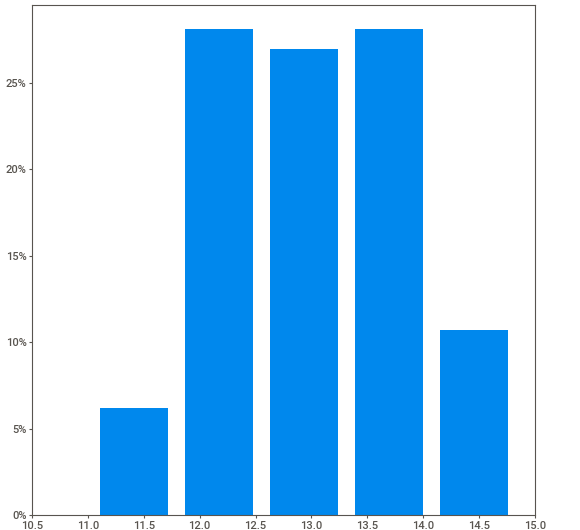
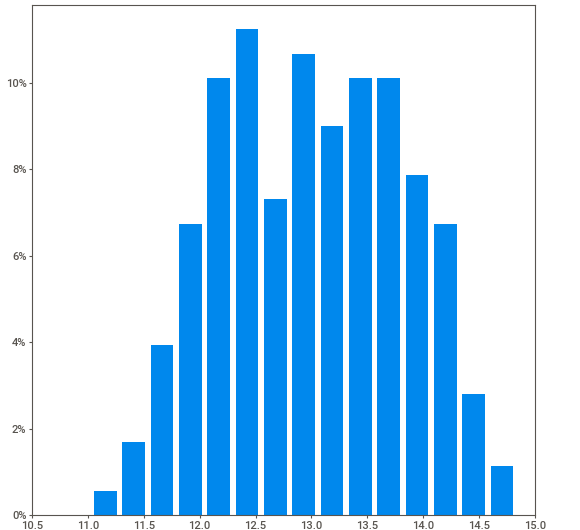
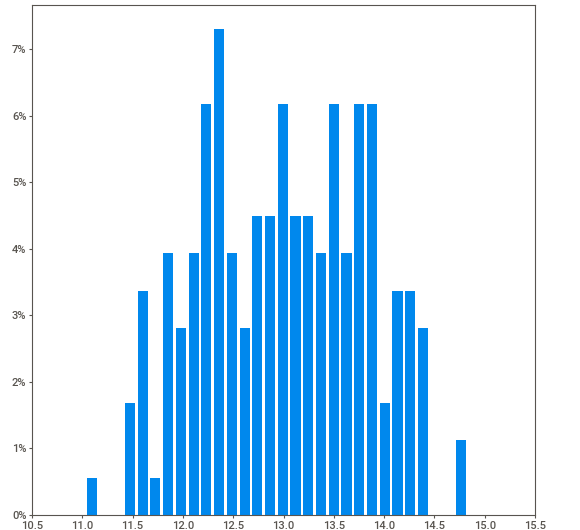
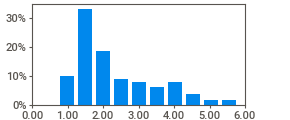
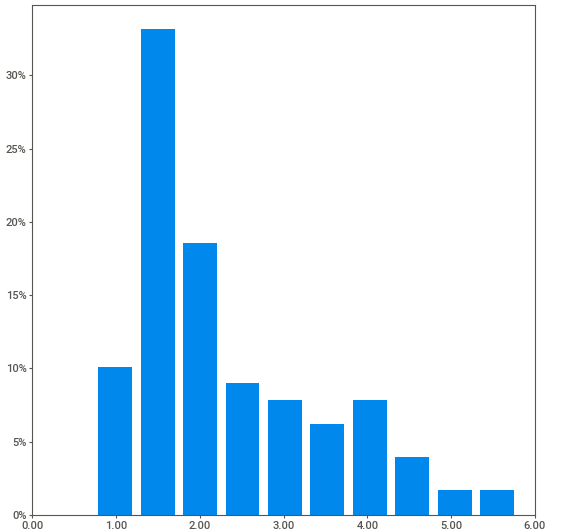
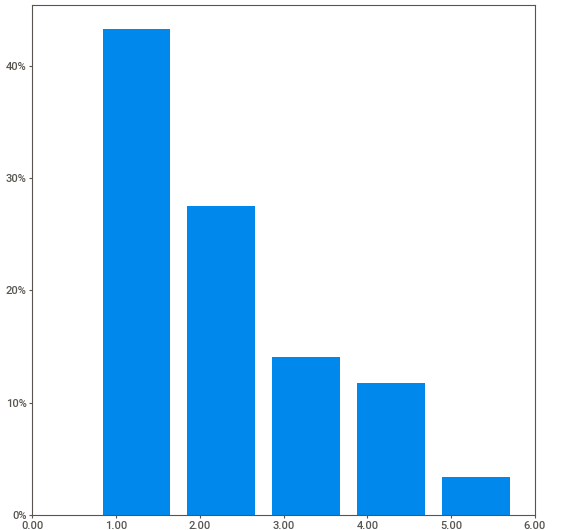
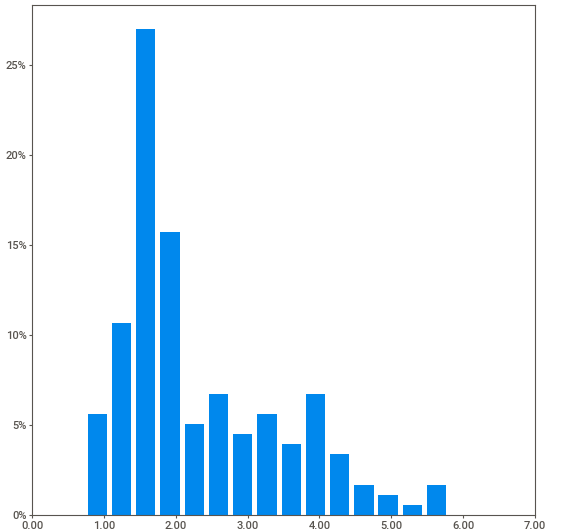
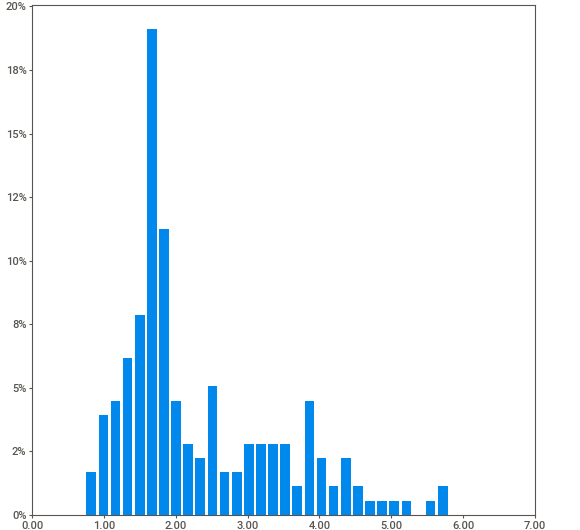
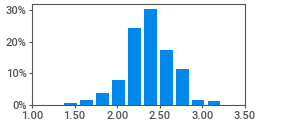
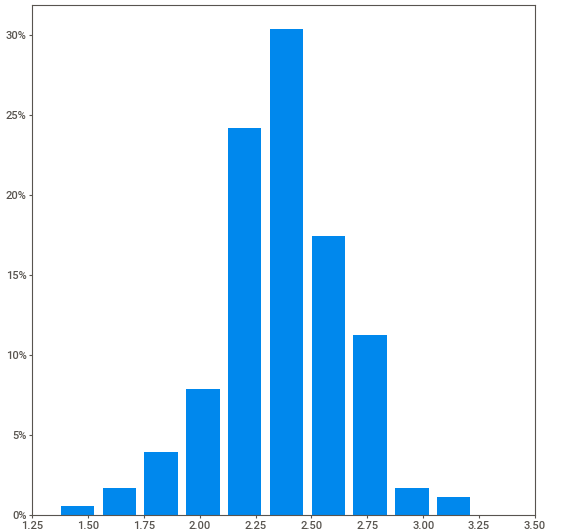
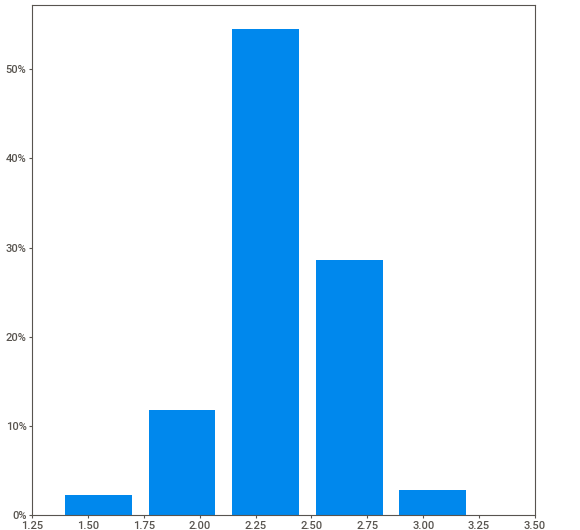
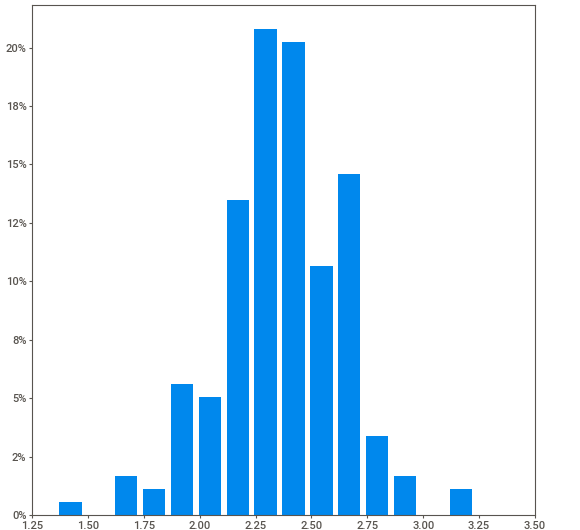
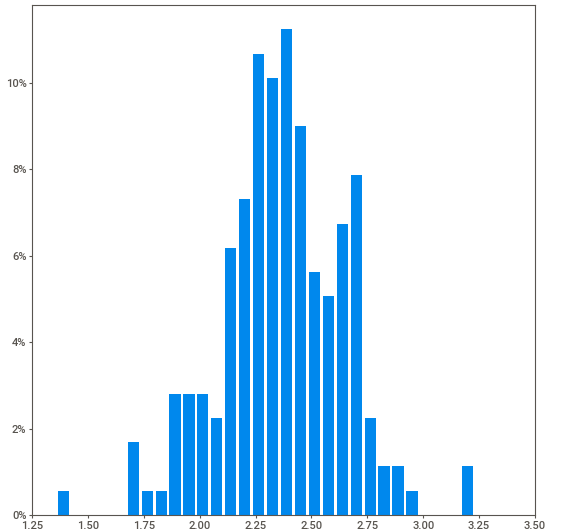
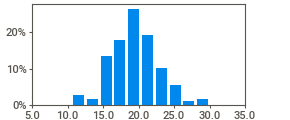
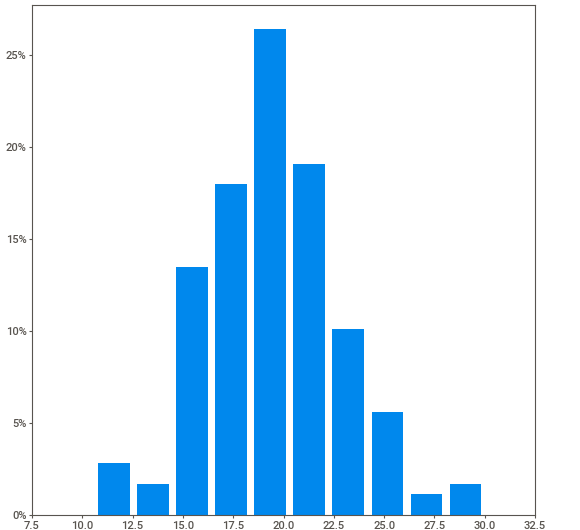
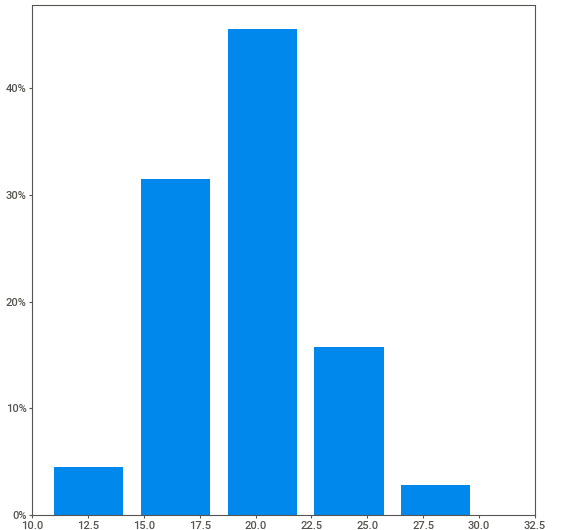
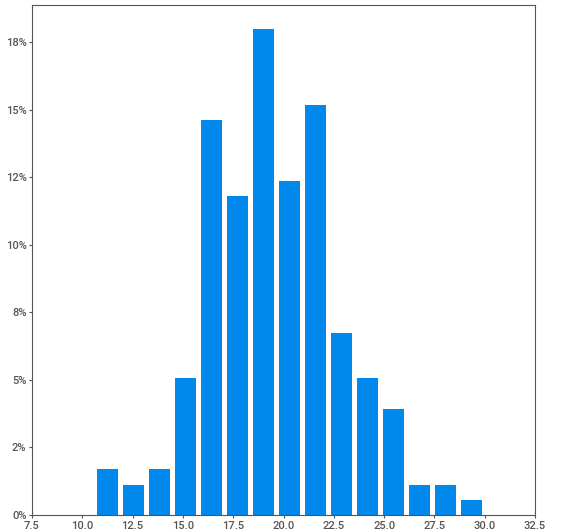
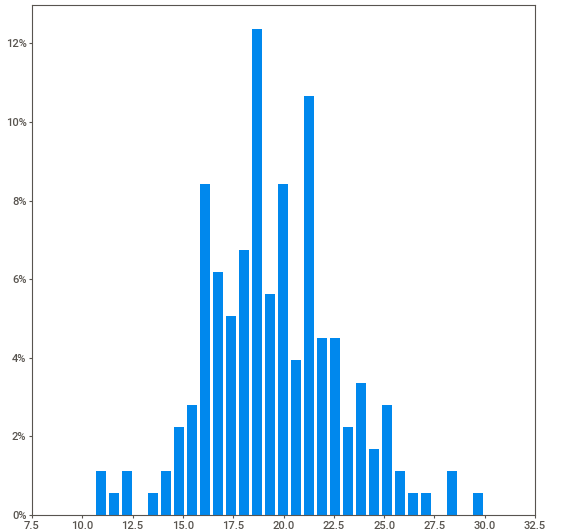
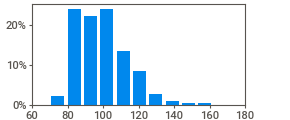
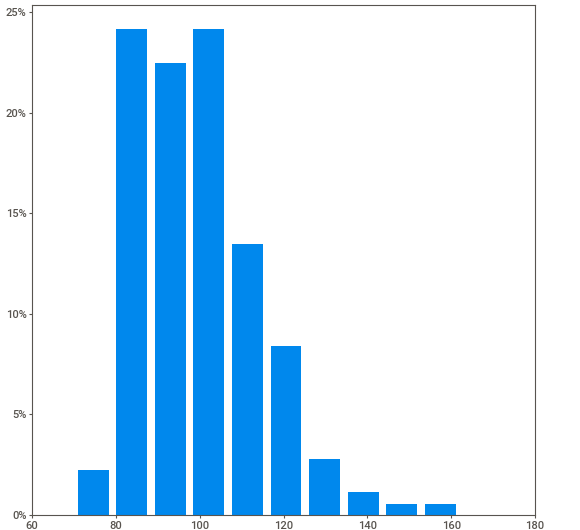
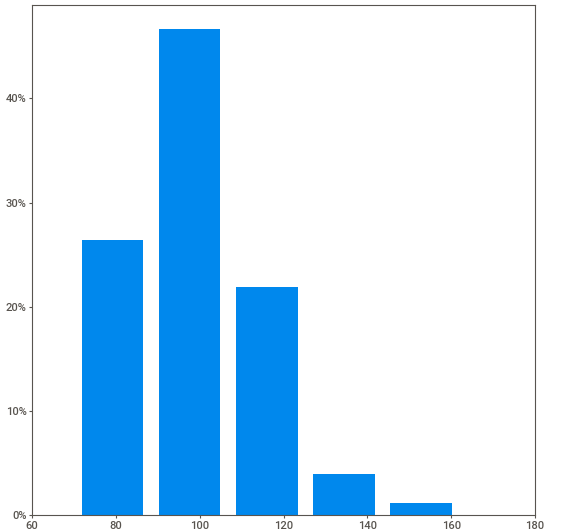
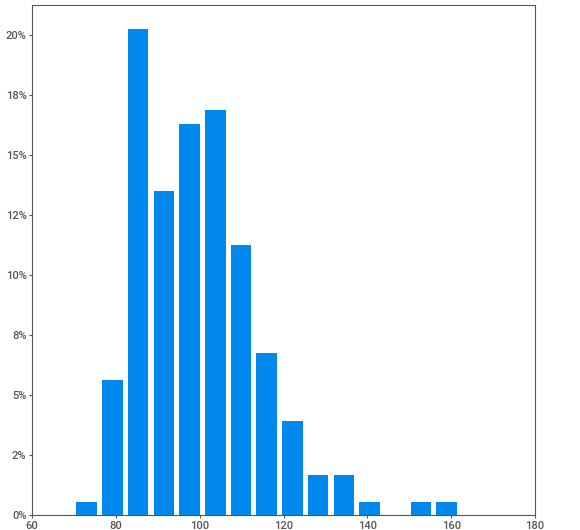
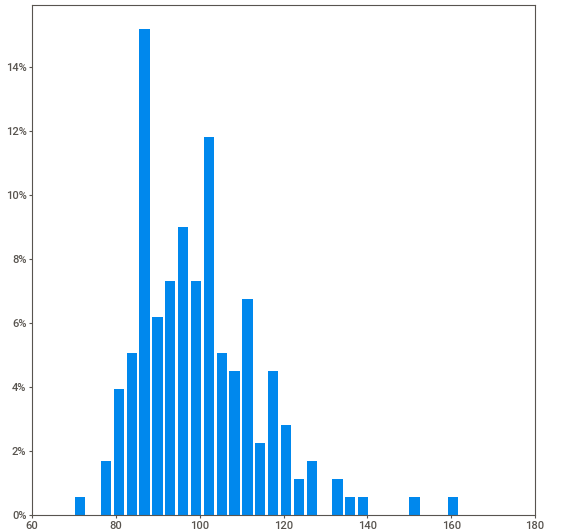
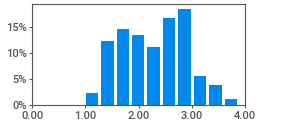
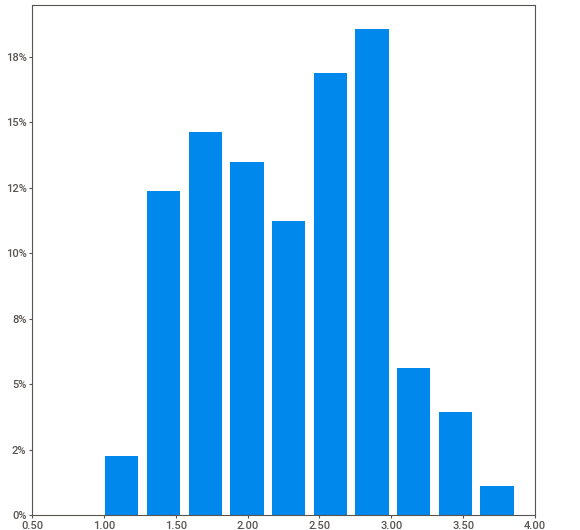
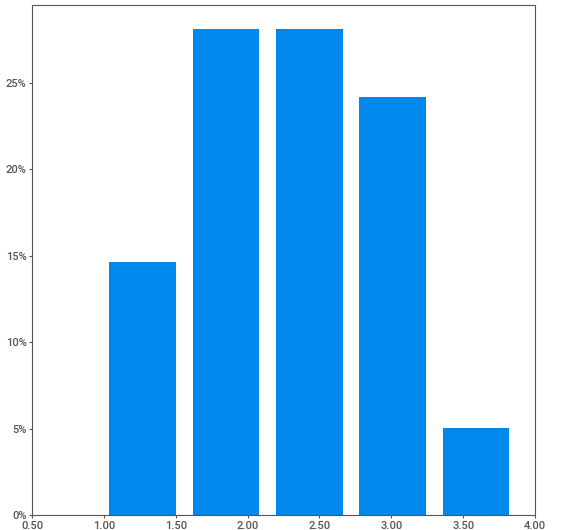
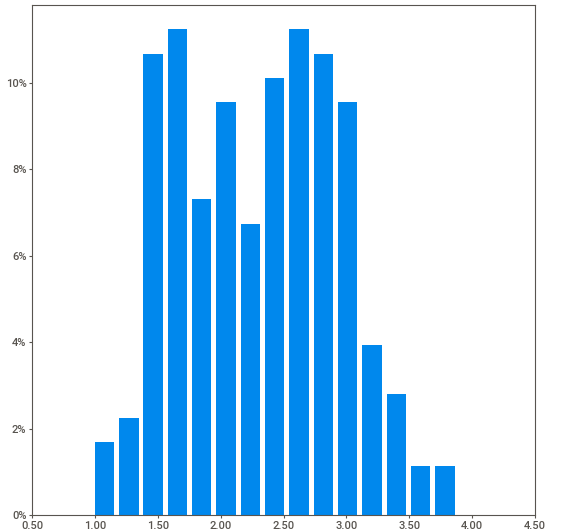
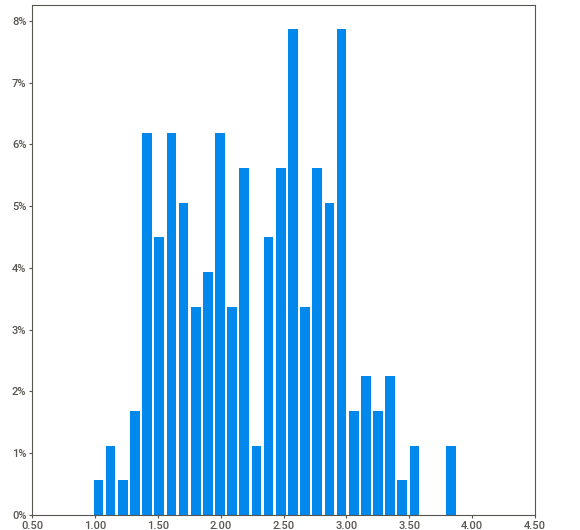
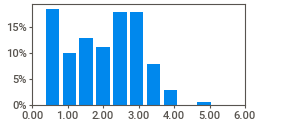
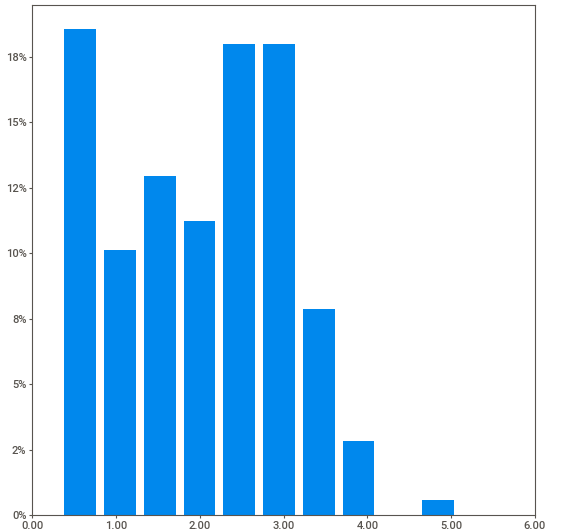
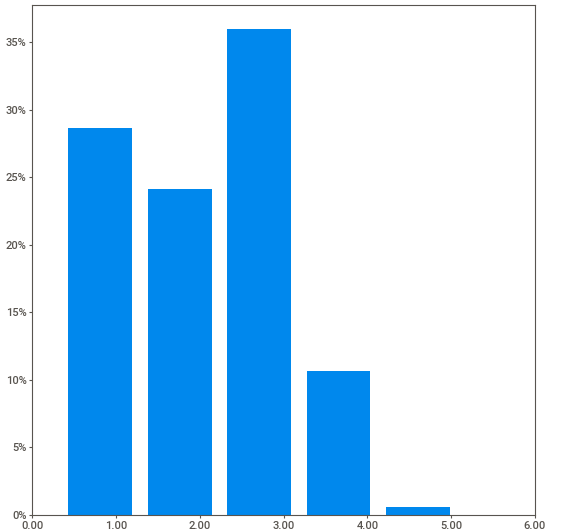
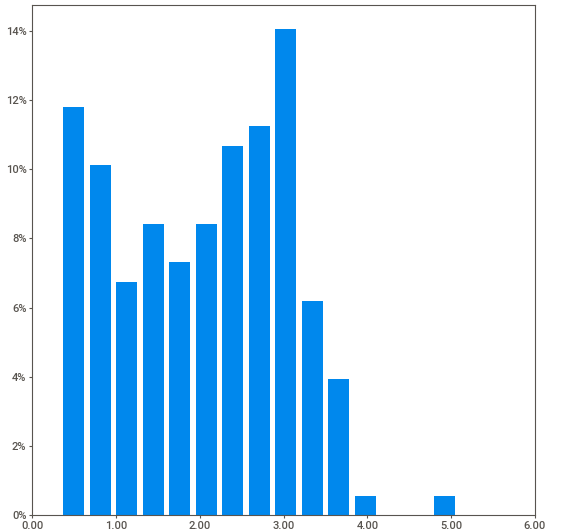
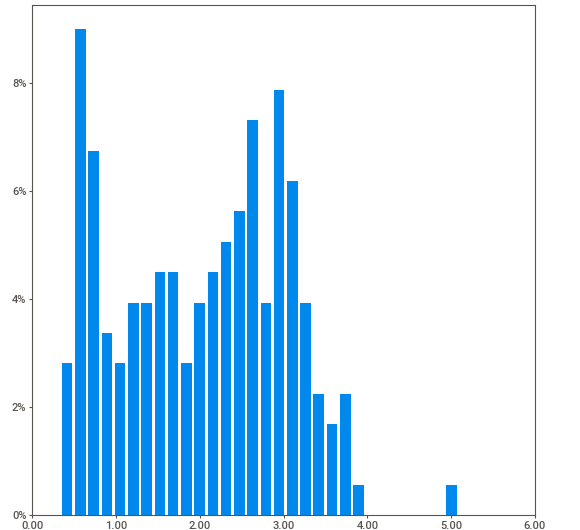
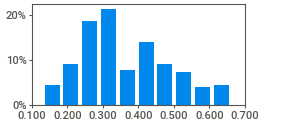
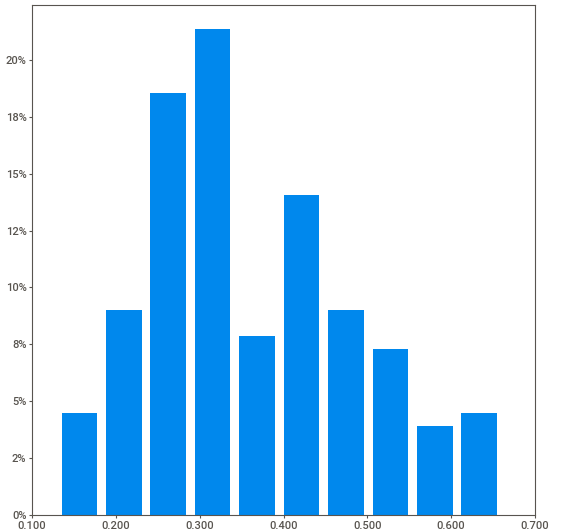
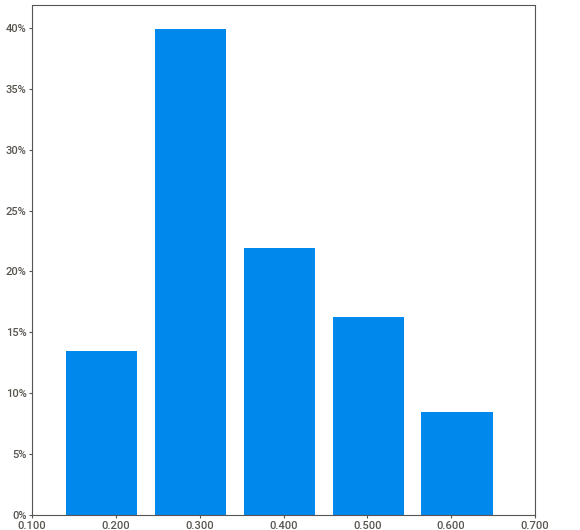
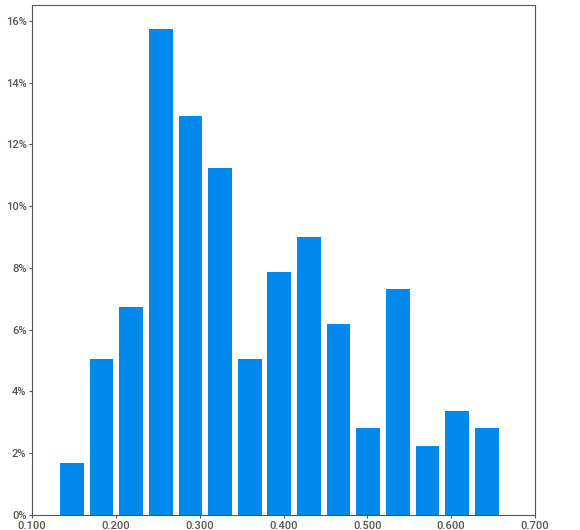
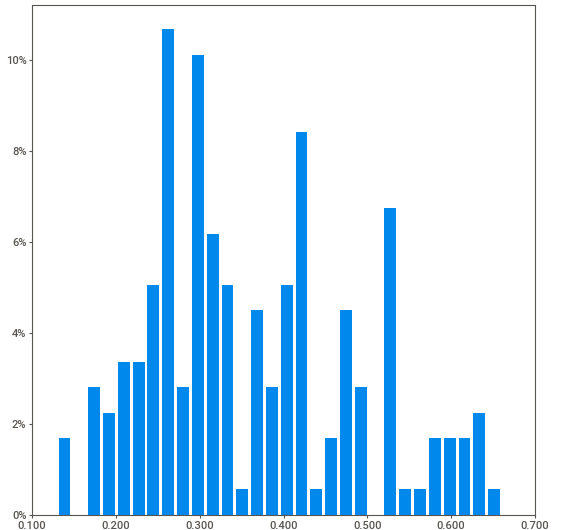
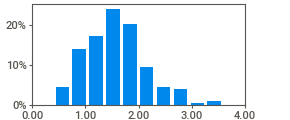
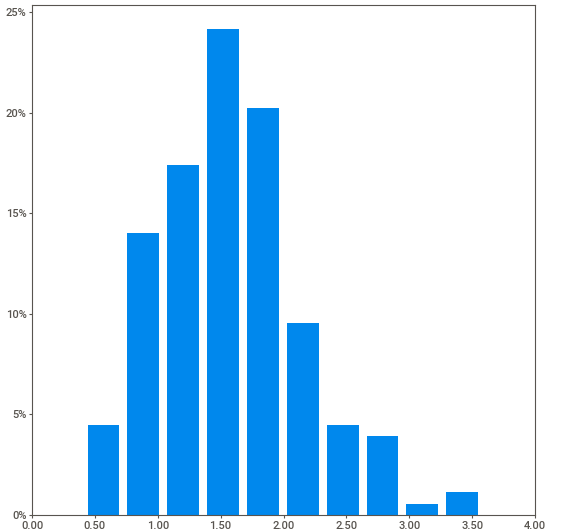
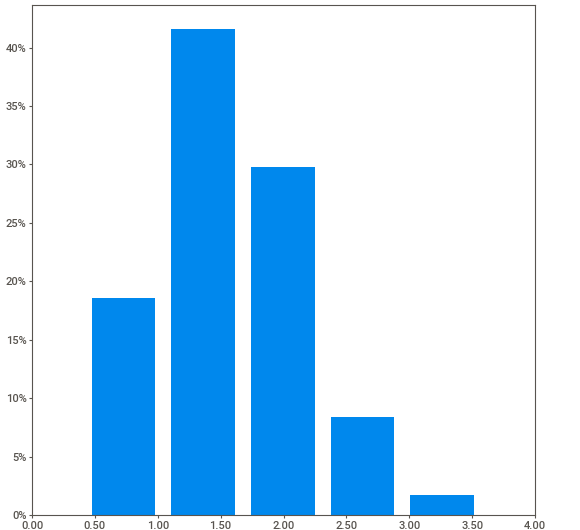
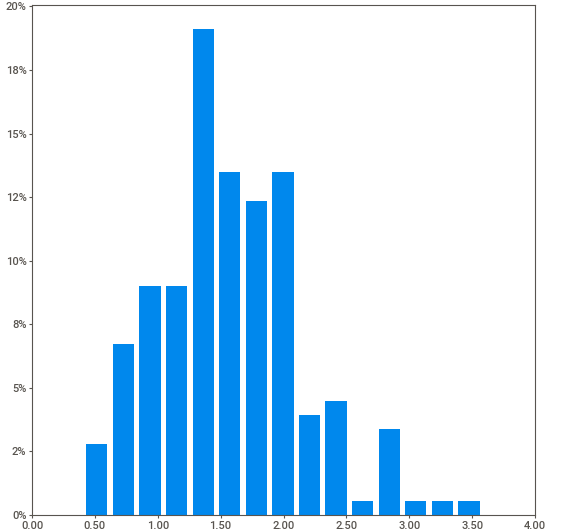
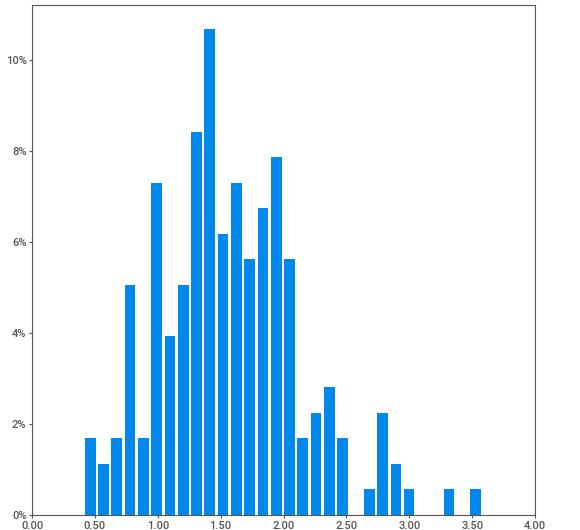
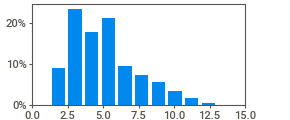
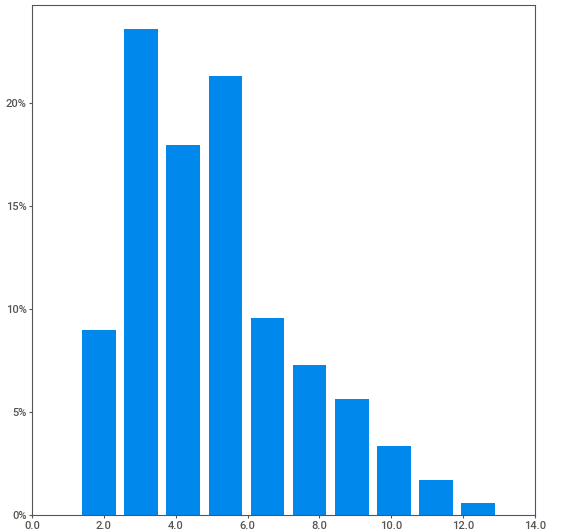
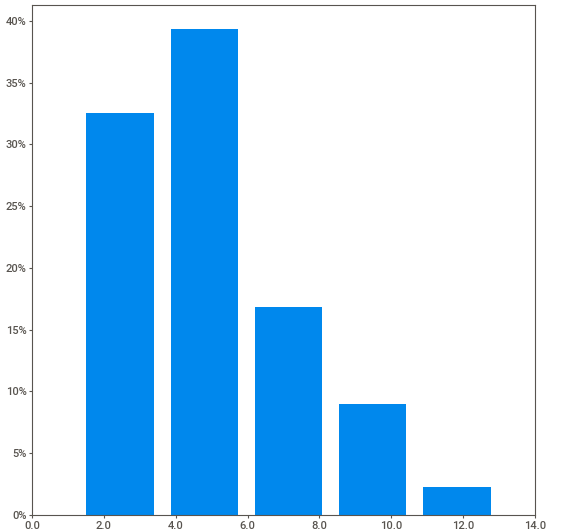
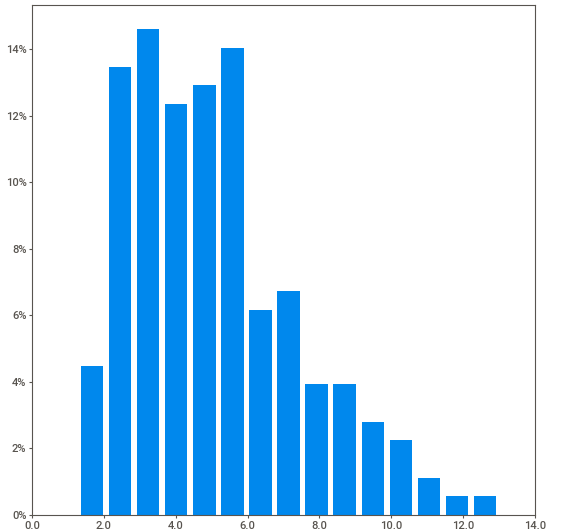
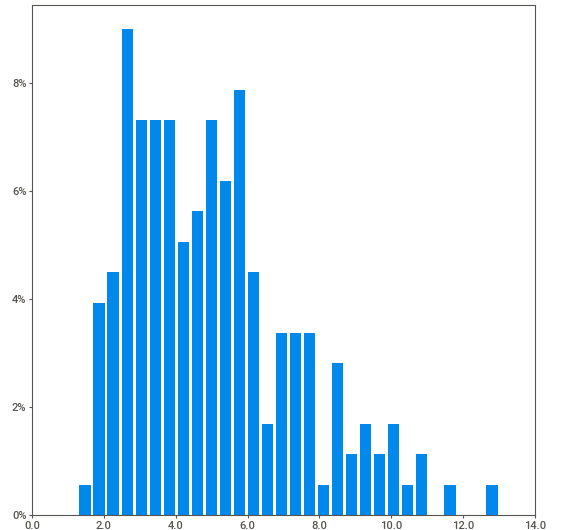
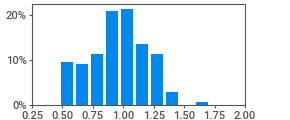
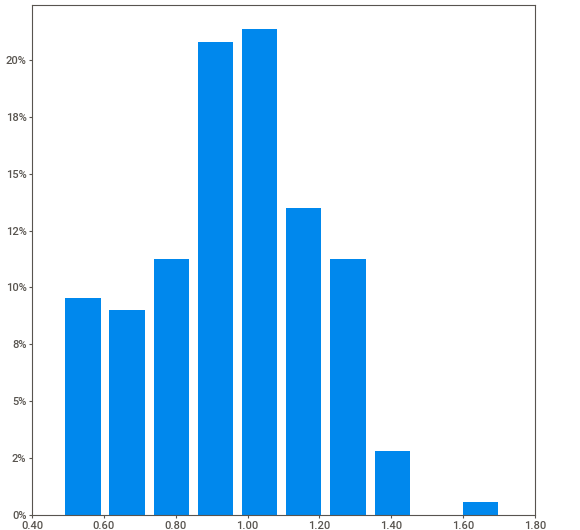
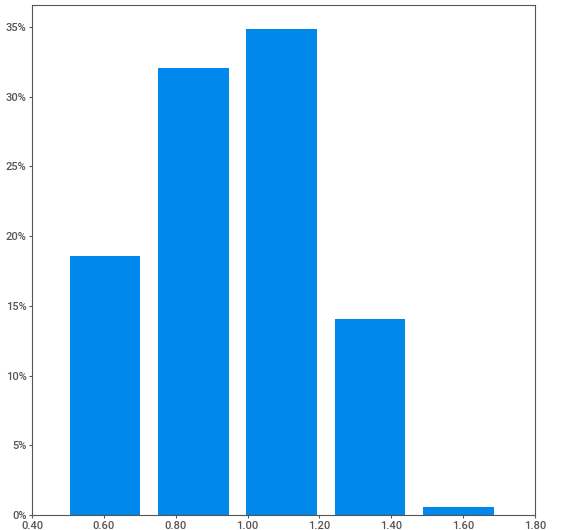
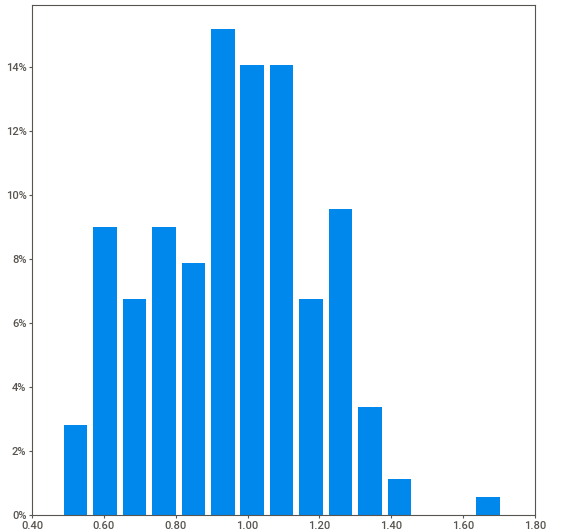
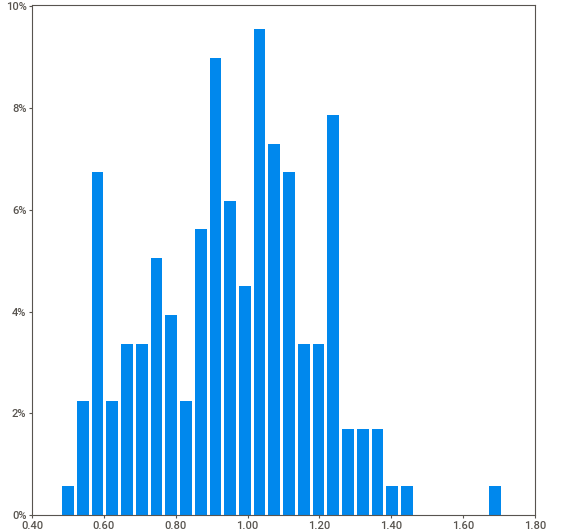
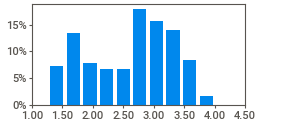
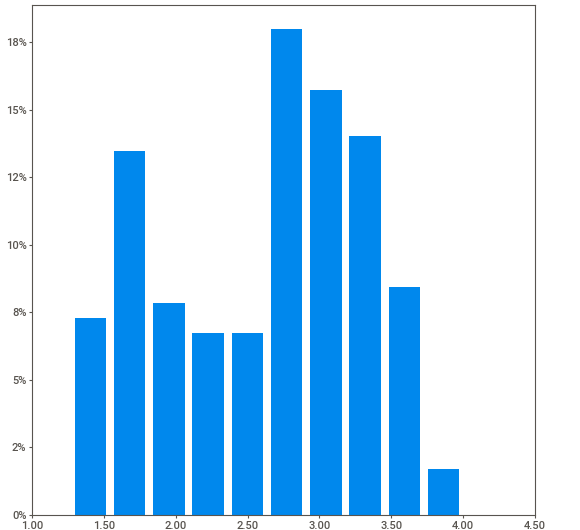
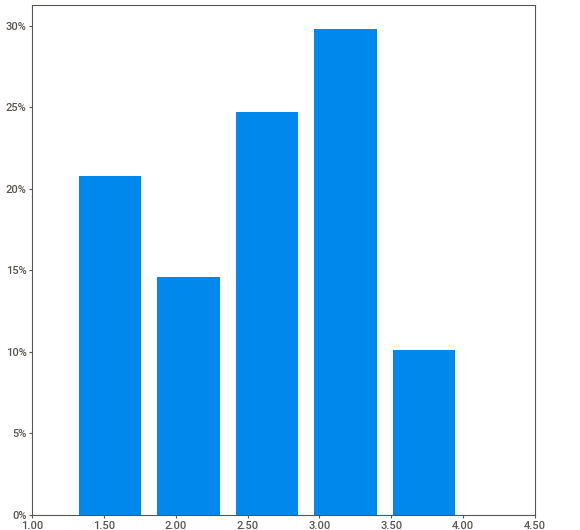
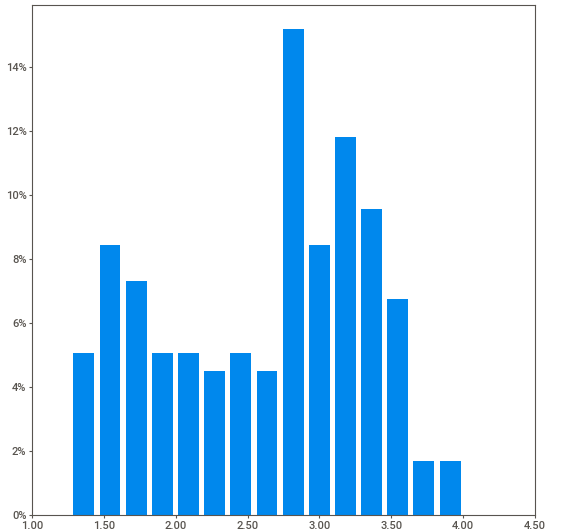
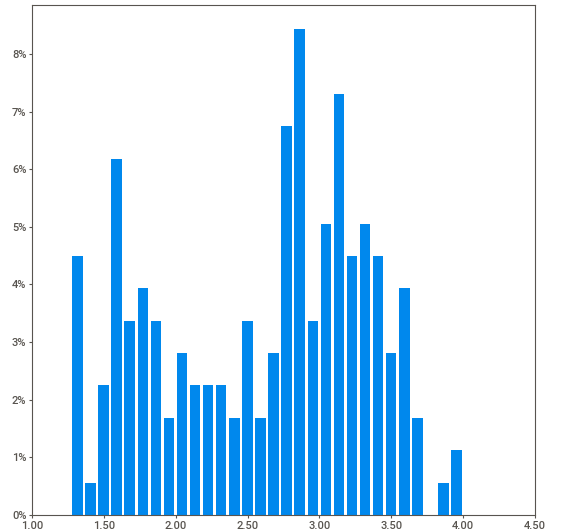
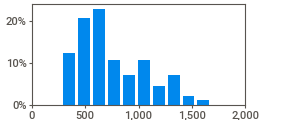
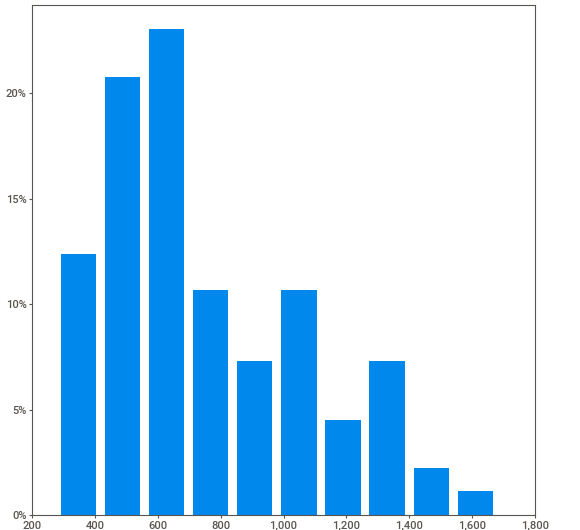
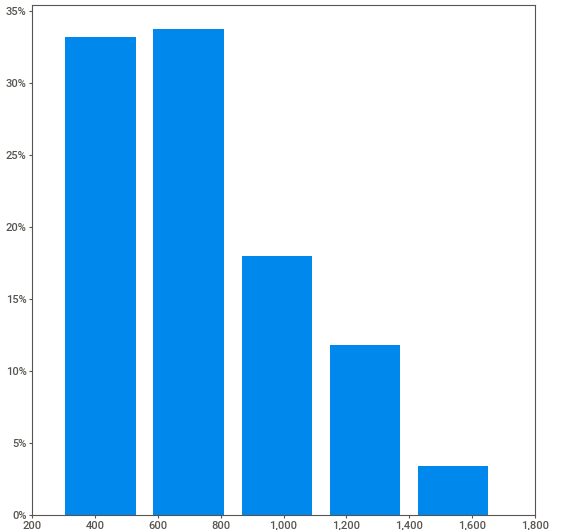
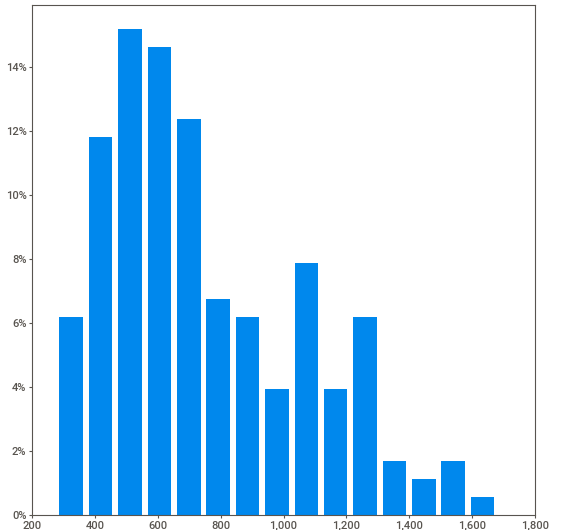
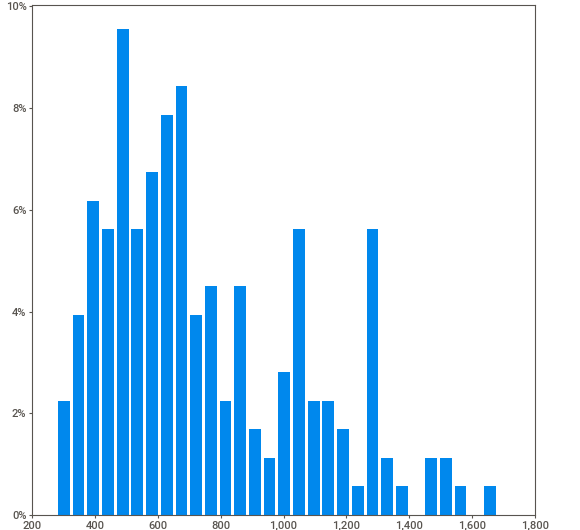
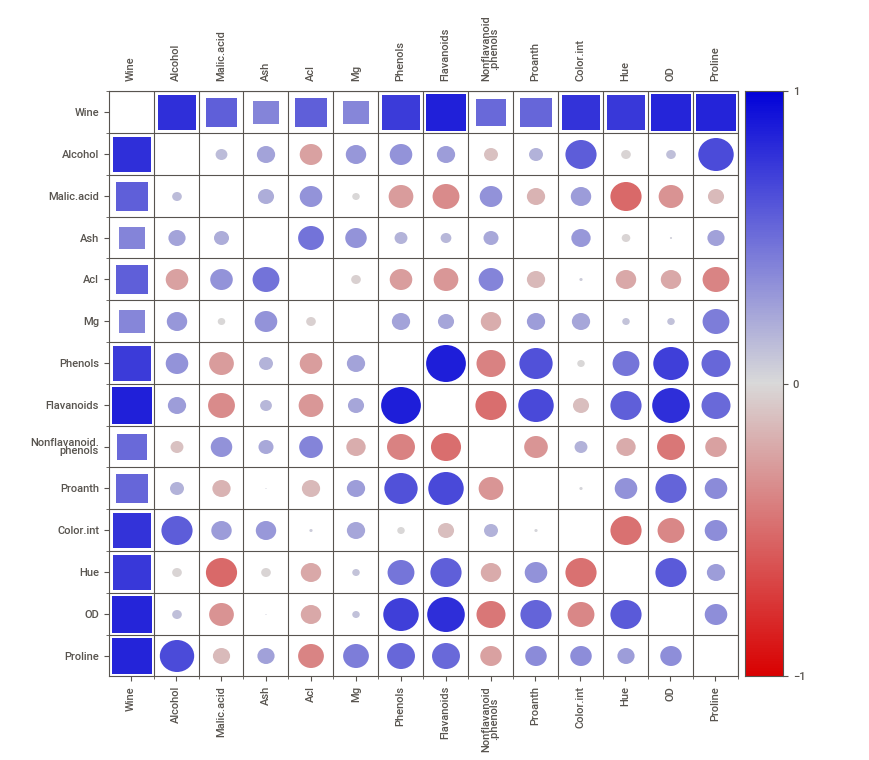
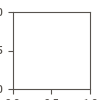

In [11]:
# Analyzing the data using the sweetviz library
sv_obj = sv.analyze(df)
sv_obj.show_notebook()

**Conclusions:** Most of the features have high correlation with each other and the dependent variable (wine). Some of the features are normally distributed, some are not normal and some are skewed.

In [12]:
# doing the train_test_split (providing the independent and the dependent feature of the dataset)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels = ['Wine'], axis = 1), df['Wine'], random_state = 0, test_size = 0.3)
print(f"x_train: {len(x_train)}, x_test: {len(x_test)}, y_train: {len(y_train)}, y_test: {len(y_test)}, \n\n x_train: {x_train}, x_test: {x_test}, y_train \
{y_train}, y_test: {y_test}")

x_train: 124, x_test: 54, y_train: 124, y_test: 54, 

 x_train:      Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
22     13.71        1.86  2.36  16.6  101     2.61        2.88   
108    12.22        1.29  1.94  19.0   92     2.36        2.04   
175    13.27        4.28  2.26  20.0  120     1.59        0.69   
145    13.16        3.57  2.15  21.0  102     1.50        0.55   
71     13.86        1.51  2.67  25.0   86     2.95        2.86   
..       ...         ...   ...   ...  ...      ...         ...   
103    11.82        1.72  1.88  19.5   86     2.50        1.64   
67     12.37        1.17  1.92  19.6   78     2.11        2.00   
117    12.42        1.61  2.19  22.5  108     2.00        2.09   
47     13.90        1.68  2.12  16.0  101     3.10        3.39   
172    14.16        2.51  2.48  20.0   91     1.68        0.70   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
22                   0.27     1.69       3.80  1.11  4.00     1035  
108  

In [13]:
# calculating mutual information

# class to do the calculation
from sklearn.feature_selection import mutual_info_classif

# the calculation part
info = mutual_info_classif(x_train, y_train)
info

array([0.41127677, 0.30700656, 0.18098658, 0.23244996, 0.19844538,
       0.48188949, 0.72055434, 0.13697696, 0.25442725, 0.60867491,
       0.56289641, 0.55324522, 0.53839337])

<Axes: >

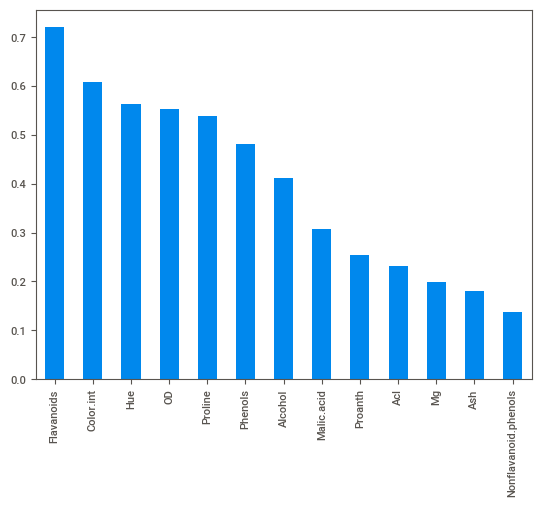

In [14]:
# converting the info array to pandas series and then assigning feature_names indexes to it so as to interpret and visulaize it better.
info = pd.Series(info)
info.index = x_train.columns

# sorting the info series and plotting them
info.sort_values(ascending = False).plot.bar()

So, here is the plot representing information gain for each feature in a decreasing order.

In [15]:
# seeing how many feature have a information gain more than 0.4
threshold = 0.4
high_info_feats = []

# looping through each feature info_val and appending the features with info_gain more than 0.4 into the high_info_feats list and printing the list.
for feat_name, feat_info in info.items():
  if feat_info > 0.4:
    high_info_feats.append(feat_name)

print(f"No. of high_info_feats: {len(high_info_feats)} \
        \n\n{high_info_feats}")

No. of high_info_feats: 7         

['Alcohol', 'Phenols', 'Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline']


As, we can see that 7 features have most than 0.4 information gain. For this example, we are now gonna select only top 7 features. We are gonna use the SelectKBest class for selecting them.

In [16]:
# importing class
from sklearn.feature_selection import SelectKBest

# doing the feature selection part
# creating instance
selected_feats = SelectKBest(mutual_info_classif, k = 7)
# selected features from the data
selected_feats.fit(x_train, y_train)
# extracting selected feature names and displaying them
selected_feats = x_train.columns[selected_feats.get_support()]
print(f"The selected features are: \n\n{selected_feats}")

The selected features are: 

Index(['Alcohol', 'Phenols', 'Flavanoids', 'Color.int', 'Hue', 'OD',
       'Proline'],
      dtype='object')


So, here we have it.

### For Regression Problem
Using kaggle's advanced house price prediction dataset.
I have downloaded the dataset, so just loading the train part of the dataset.

**Link:** https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques


#### Preprocessing part

In [137]:
# loading and displaying the dataset
house_df = pd.read_csv('house-price.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The data have a lot of columns with different data types. We are gonna use only the numerical features for this example.

In [138]:
# extracting only the non-categorical(numerical) features
house_df = house_df[[feature_name for feature_name in house_df.columns if house_df[feature_name].dtype != 'O']]
house_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


So we got 38 features now.

In [139]:
# seeing the data types of the features
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [140]:
# dropping the id feature
house_df = house_df.drop('Id', axis = 1)

In [141]:
# doing the train_test_split
# importing libraries
from sklearn.model_selection import train_test_split

# the splittion part
x_train, x_test, y_train, y_test = train_test_split(house_df.drop('SalePrice', axis = 1), house_df['SalePrice'], test_size = 0.3, random_state = 20)

In [142]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
609,20,61.0,7943,4,5,1961,1961,192.0,903,0,...,261,64,0,39,0,0,0,0,4,2007
865,20,NaN,8750,5,6,1970,1970,76.0,828,0,...,902,0,0,0,0,0,0,0,8,2009
274,20,76.0,8314,5,7,1982,1982,0.0,546,0,...,264,168,0,0,0,0,0,0,6,2007
542,20,78.0,10140,7,5,1998,1999,0.0,144,1127,...,583,78,73,0,0,0,0,0,6,2009
62,120,44.0,6442,8,5,2006,2006,178.0,24,0,...,484,120,49,0,0,0,0,0,10,2007


Everthing is fine, let's keep going.

In [143]:
# handling features with missing values

# making list of feature names that have nan values more than 1
feats_with_nan = [feature_name for feature_name in x_train.columns if x_train[feature_name].isnull().sum() > 1]
# for each feature with nan values filling them using the median of the particular feature
for feature in feats_with_nan:
  x_train[feature] = x_train[feature].fillna(x_train[feature].median())

# checking if any feature contains missing values
x_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

#### Computation part
The information gain comes between 0 and 1. The more near the value is to 1, the more informational/important the feature is.

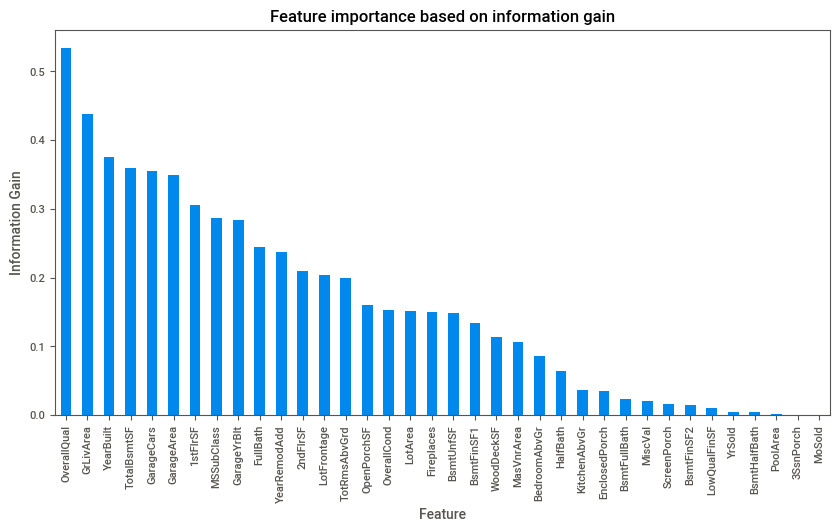

In [145]:
# importing the necessary class
from sklearn.feature_selection import mutual_info_regression

# computing information gain
feat_infos = mutual_info_regression(x_train, y_train)
# creating pandas series with feature name as index
feat_infos = pd.Series(feat_infos, index = x_train.columns)
# sorting the series and plotting the data to get better visualization
feat_infos.sort_values(ascending = False).plot.bar(figsize = (10, 5))
plt.title('Feature importance based on information gain')
plt.xlabel('Feature')
plt.ylabel('Information Gain')
plt.show()

Here we got a beautiful graph revealing the information gain of each numerical feature (we have used).

#### Selecting the top 80% features

In [155]:
# importing the library
from sklearn.feature_selection import SelectPercentile

# performing the computation ( creating instance and fitting the data )
high_info_feats = SelectPercentile(mutual_info_regression, percentile = 80).fit(x_train, y_train)
# showing names of the highly influencing features
high_info_feats = x_train.columns[high_info_feats.get_support()]

high_info_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'],
      dtype='object')

I think that the SelectKBest is more appropriate technique to select the top features.

## Using chi2 ( computing categorical feature dependency )
As this technique uses expected and observed frequencies so we use this technique to compute dependency between the two categorical features i.e. independent features and the dependent feature (categorical).
- We simpy use the encoded all the independent features and the encoded dependent feature and perform the calculation.
- For this example, we will be using some of the features from the titanic dataset (as it is well known and have the features to best showcase this example.)

### Loading titanic dataset and doing preprocessing

In [59]:
# loading the dataset and displaying  the head
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
# Selecting the required features
titanic_df = titanic_df[['survived', 'sex', 'pclass', 'sibsp', 'embarked']]
titanic_df.head()

,survived,sex,pclass,sibsp,embarked
0,0,male,3,1,S
1,1,female,1,1,C
2,1,female,3,0,S
3,1,female,1,1,S
4,0,male,3,0,S


We have now all the categorical featuers in the dataset

In [61]:
# performing label encoding for the featuers that have alphabetical values
# label encoding for sex feature (1 for male and 0 for female)
titanic_df['sex'] = (titanic_df['sex'] == 'male').astype(int)

# label encoding for embarked feature
# replacing missing values with new label. Using 1,2,3,4.
titanic_df['embarked'] = titanic_df['embarked'].fillna('Missing')
# doing label encoding
titanic_df['embarked'] = titanic_df['embarked'].map({'S': 1, 'C': 2, 'Q': 3, 'Missing': 4}).astype(int)

In [62]:
# here is how the data now looks
titanic_df.head()

,survived,sex,pclass,sibsp,embarked
0,0,1,3,1,1
1,1,0,1,1,2
2,1,0,3,0,1
3,1,0,1,1,1
4,0,1,3,0,1


In [64]:
# checking if there are anny missing values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  891 non-null    int64
 1   sex       891 non-null    int64
 2   pclass    891 non-null    int64
 3   sibsp     891 non-null    int64
 4   embarked  891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB


So, there are no null values and all features have the data type int or float.

In [68]:
# doing the train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, t_test = train_test_split(titanic_df.drop('survived', axis = 1), titanic_df['survived'], test_size = 0.3, random_state = 20)

In [75]:
len(x_train)

623

Everything is good till here.

### The chi2 feature selection part

In [77]:
# importing the library
from sklearn.feature_selection import chi2

# doing the computation for training data
chi2_values = chi2(x_train, y_train)
chi2_values

(array([66.58586122, 23.53234378,  0.93361761,  4.19248391]),
 array([3.34980198e-16, 1.22831431e-06, 3.33924652e-01, 4.06035643e-02]))

The 2 arrays indicate the f_values and the p_values for each feature. The higher the f_value or lower the p_value, the more important the feature is.

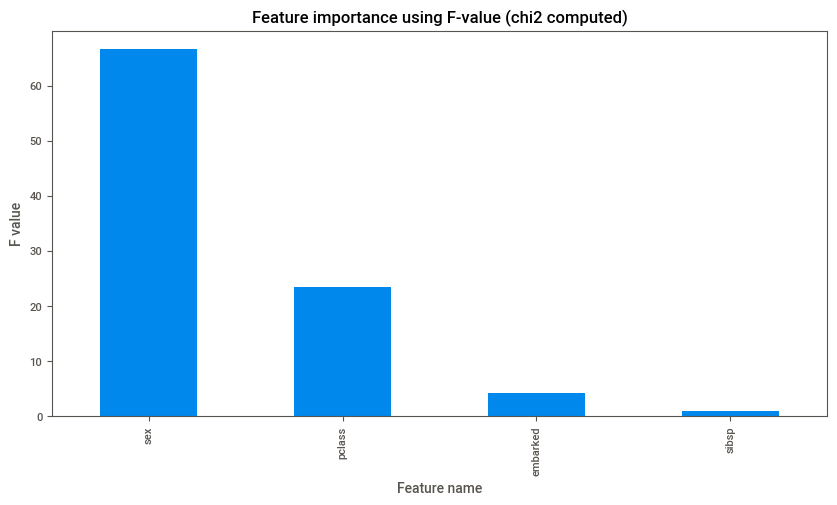

In [114]:
# creating series and plotting to visualize the results
best_feats_usng_pval = pd.Series(chi2_values[0], index = x_train.columns)
# sorting the series
best_feats_usng_pval.sort_values(ascending = False).plot.bar(figsize = (10, 5))
plt.xlabel('Feature name')
plt.ylabel('F value')
plt.title('Feature importance using F-value (chi2 computed)')
plt.show()

So, here is the visualization showing importance/dependence of the feature in decreasing order.